# **URBAN SOCIAL CRIME CLASSIFICATION AND VISUALIZATION**

# **SUBMITTED BY:**
# SIDDHARTH THAKUR - 20BCE1144
# PPT LINK : https://www.canva.com/design/DAFawYd2-4M/U7I_coBk3OtTah8ca6H7Fg/edit?utm_content=DAFawYd2-4M&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
data_frame = pd.read_csv("crime_data.csv")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
data_frame.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


# Data Wrangling

In [ ]:
data_frame = data_frame.drop(['Unnamed: 0'], axis=1)
data_frame = data_frame.drop(['ID'], axis=1)
data_frame = data_frame.drop(['Case Number'], axis=1) 
data_frame = data_frame.drop(['Date'], axis=1) 
data_frame = data_frame.drop(['Updated On'], axis=1) 

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134900 entries, 0 to 134899
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 134900 non-null  object 
 1   IUCR                  134900 non-null  object 
 2   Primary Type          134900 non-null  object 
 3   Description           134900 non-null  object 
 4   Location Description  134777 non-null  object 
 5   Arrest                134900 non-null  bool   
 6   Domestic              134900 non-null  bool   
 7   Beat                  134900 non-null  int64  
 8   District              134900 non-null  int64  
 9   Ward                  134899 non-null  float64
 10  Community Area        134900 non-null  int64  
 11  FBI Code              134900 non-null  object 
 12  X Coordinate          132995 non-null  float64
 13  Y Coordinate          132995 non-null  float64
 14  Year                  134900 non-null  int64  
 15  

In [ ]:
# Convert Categorical Attributes to Numerical
data_frame['Block'] = pd.factorize(data_frame["Block"])[0]
data_frame['IUCR'] = pd.factorize(data_frame["IUCR"])[0]
data_frame['Description'] = pd.factorize(data_frame["Description"])[0]
data_frame['Location Description'] = pd.factorize(data_frame["Location Description"])[0]
data_frame['FBI Code'] = pd.factorize(data_frame["FBI Code"])[0]
data_frame['Location'] = pd.factorize(data_frame["Location"])[0] 

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [ ]:
all_classes = data_frame.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
data_frame.loc[data_frame['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'


# **Exploratory Data Analysis**

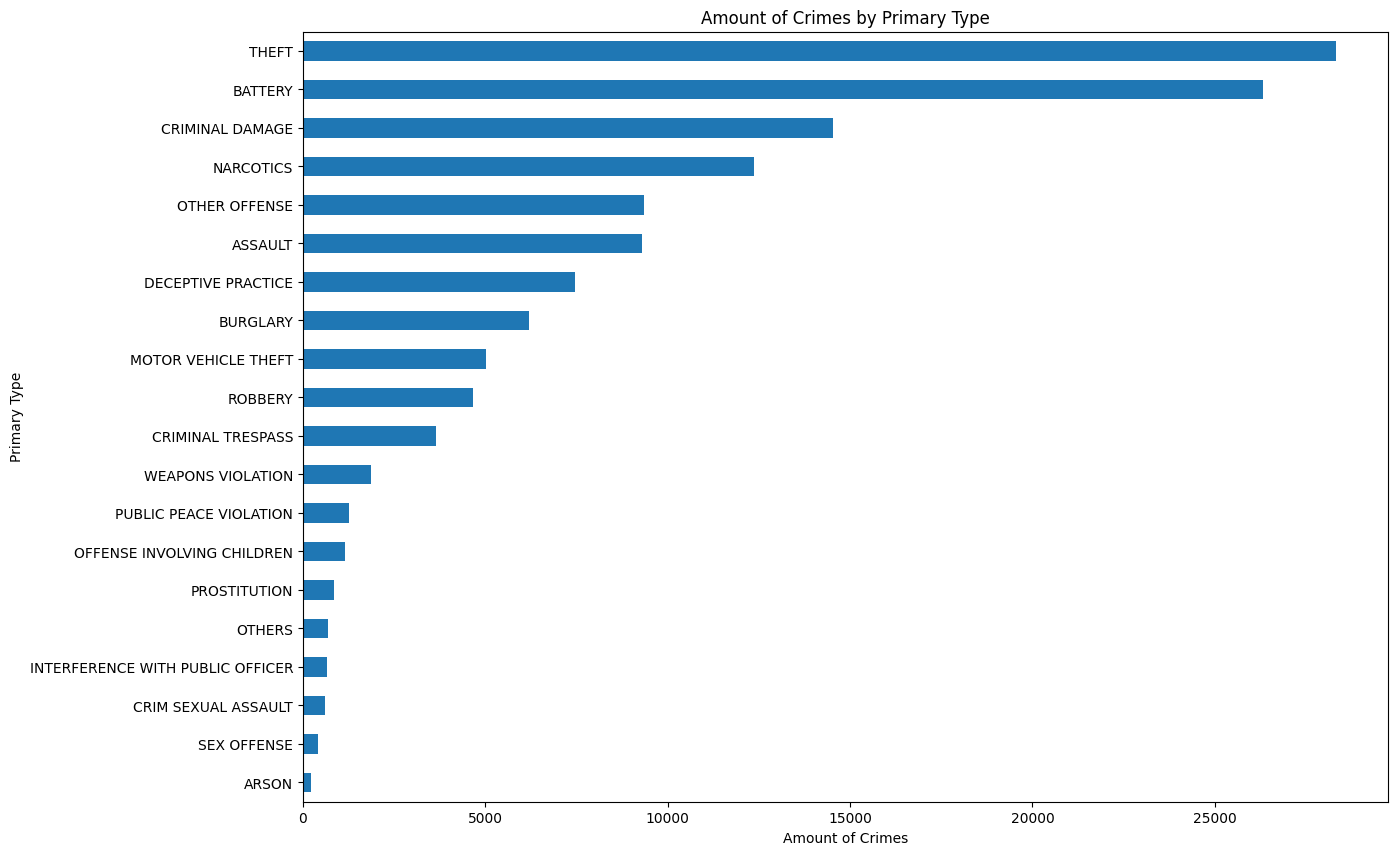

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
all_classes = data_frame.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
3,BURGLARY,6200
9,MOTOR VEHICLE THEFT,5021
16,ROBBERY,4653
6,CRIMINAL TRESPASS,3637
19,WEAPONS VIOLATION,1859
15,PUBLIC PEACE VIOLATION,1272
11,OFFENSE INVOLVING CHILDREN,1143
14,PROSTITUTION,846
13,OTHERS,686
8,INTERFERENCE WITH PUBLIC OFFICER,671


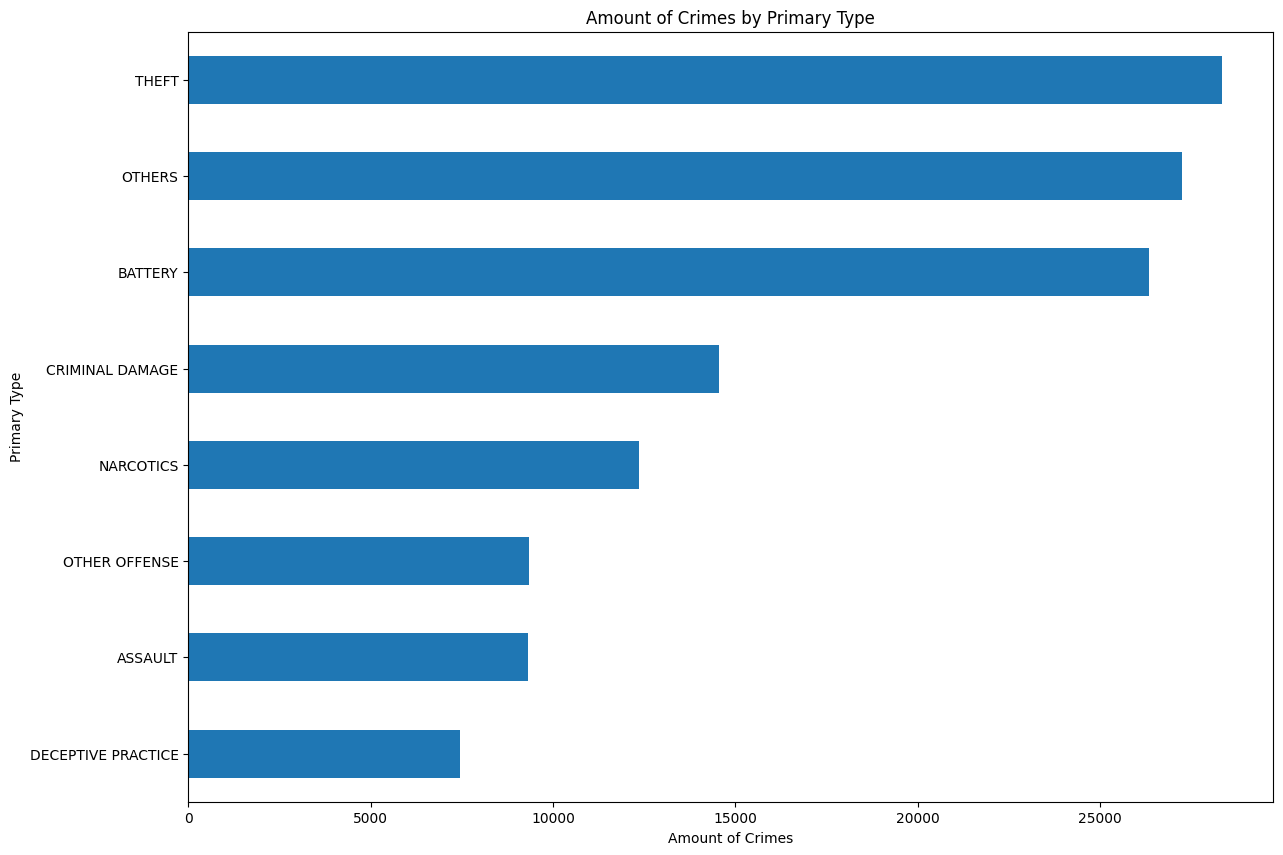

In [ ]:
data_frame.loc[data_frame['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

<Axes: xlabel='count', ylabel='Primary Type'>

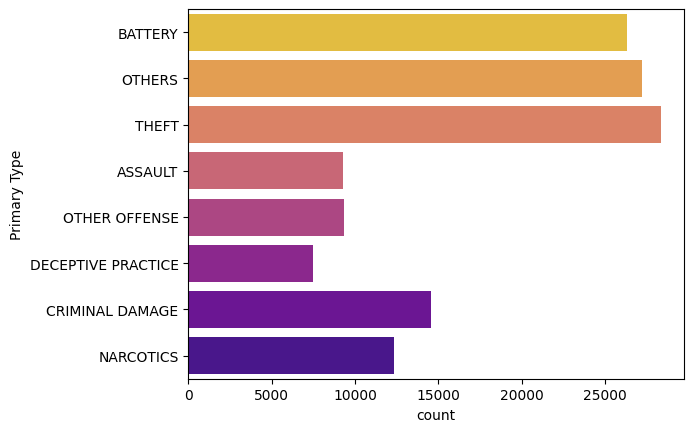

In [ ]:
sns.countplot(y='Primary Type',data=data_frame, palette="plasma_r")

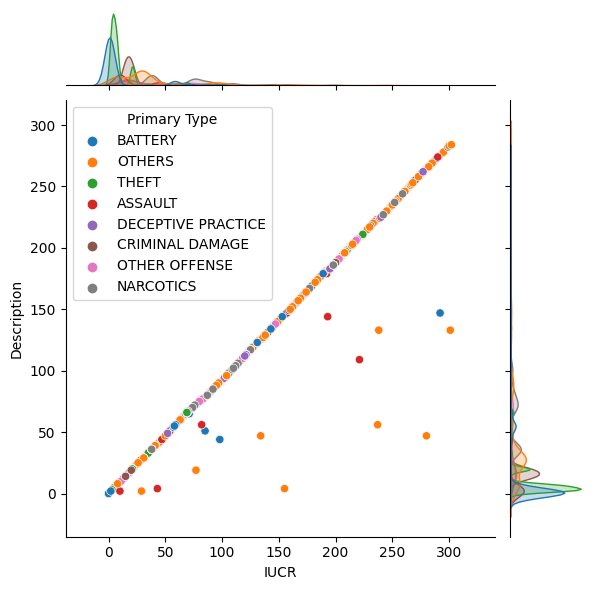

In [ ]:
sns.jointplot(x="IUCR",y="Description",data=data_frame[(data_frame['Community Area']>10) & (data_frame['Community Area']<50)],hue="Primary Type")

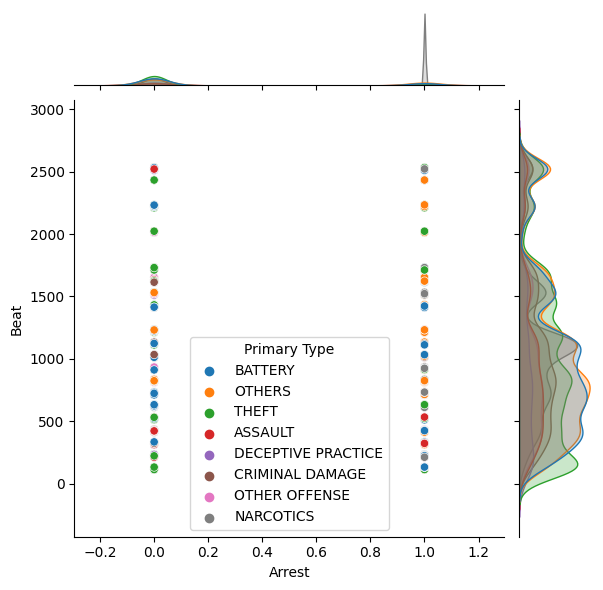

In [ ]:
sns.jointplot(x="Arrest",y="Beat",data=data_frame[(data_frame['Community Area']>10) & (data_frame['Ward']<50)],hue="Primary Type")

<Axes: xlabel='Year', ylabel='Primary Type'>

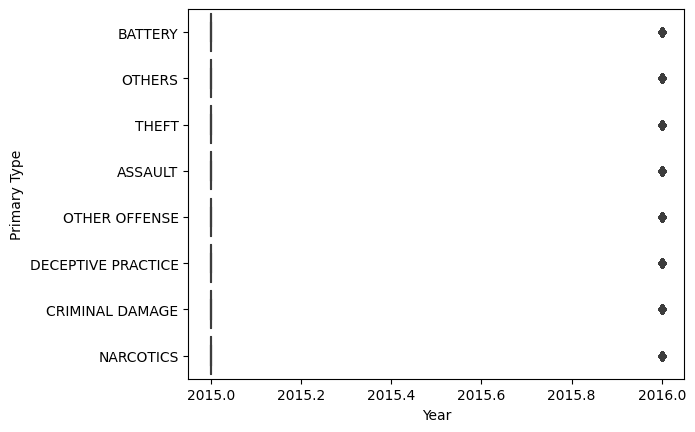

In [ ]:
sns.boxplot(y='Primary Type',x='Year',data=data_frame)

<Axes: xlabel='Community Area', ylabel='Ward'>

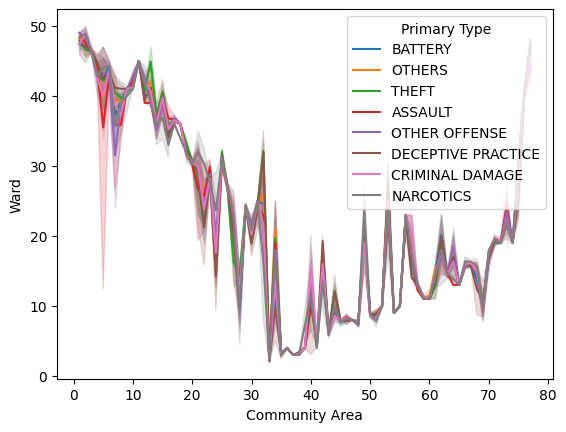

In [ ]:
sns.lineplot(data = data_frame[(data_frame['Year']>2015)], x = "Community Area", y = "Ward",hue="Primary Type")

In [ ]:
Classes = data_frame['Primary Type'].unique()
Classes

array(['BATTERY', 'OTHERS', 'THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'NARCOTICS'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
data_frame['Primary Type'] = pd.factorize(data_frame["Primary Type"])[0] 
data_frame['Primary Type'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
data_frame.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,0,0,0,0,0,True,True,1022,10,24.0,29,0,1154907.0,1893681.0,2016,41.864073,-87.706819,0
1,1,0,0,0,1,False,True,313,3,20.0,42,0,1183066.0,1864330.0,2016,41.782922,-87.604363,1
2,2,1,1,1,2,False,False,1524,15,37.0,25,1,1140789.0,1904819.0,2016,41.894908,-87.758372,2
3,3,2,0,2,3,False,False,1532,15,28.0,25,0,1143223.0,1901475.0,2016,41.885687,-87.749516,3
4,4,3,2,3,1,False,True,1523,15,28.0,25,2,1139890.0,1901675.0,2016,41.886297,-87.761751,4


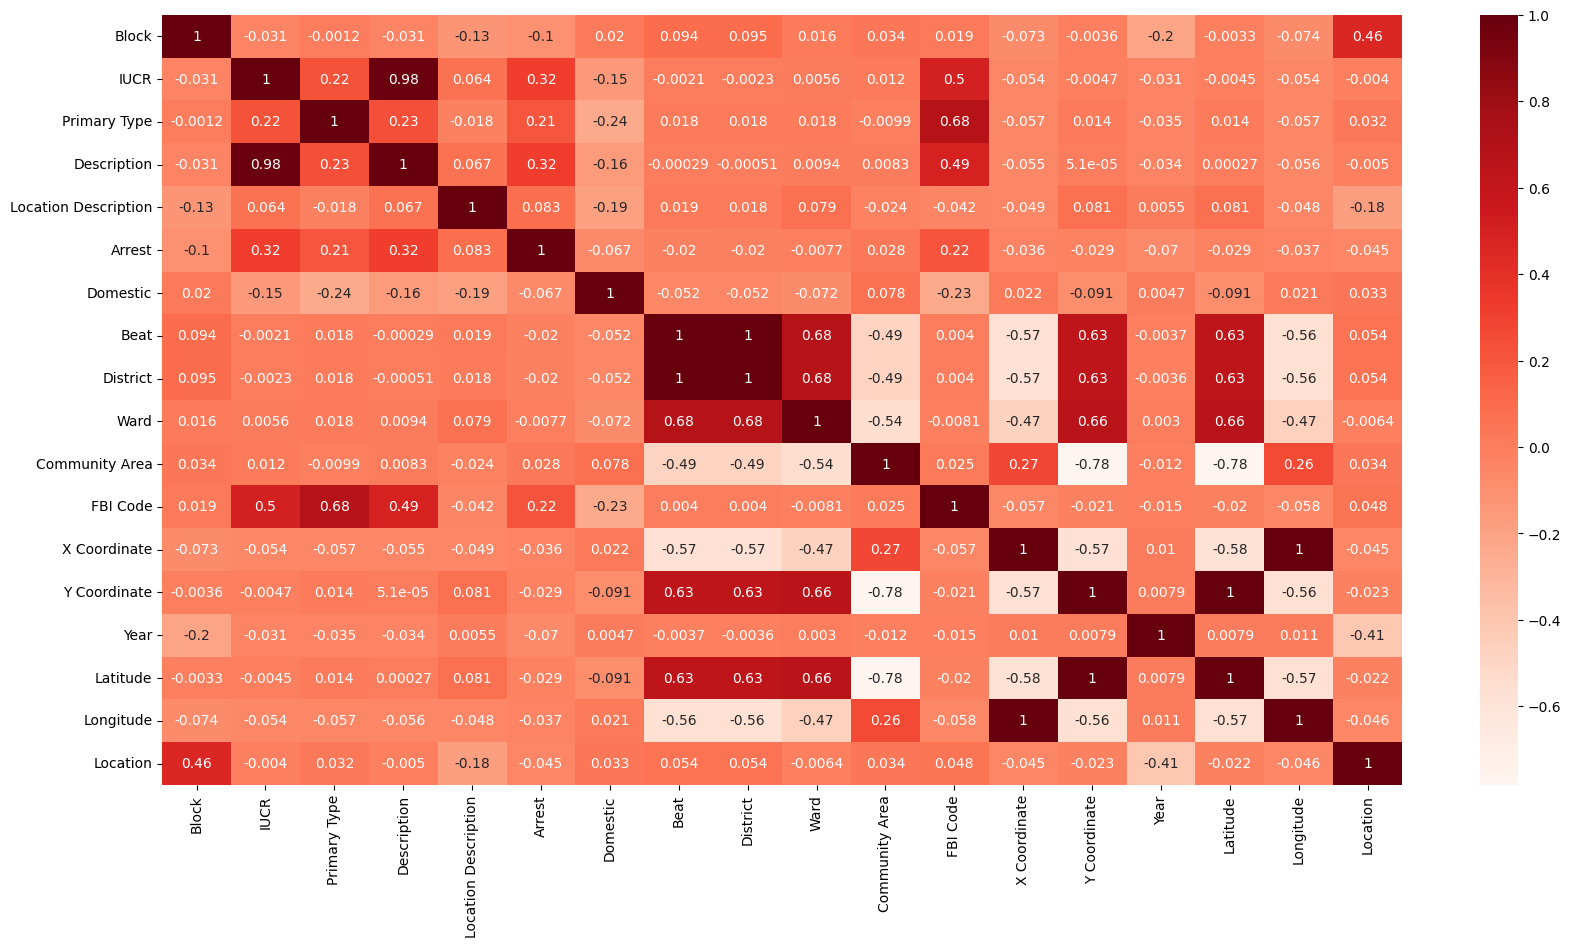

In [ ]:
X_fs = data_frame.drop(['Primary Type'], axis=1)
Y_fs = data_frame['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
data_frame.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134900 entries, 0 to 134899
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 134900 non-null  int64  
 1   IUCR                  134900 non-null  int64  
 2   Primary Type          134900 non-null  int64  
 3   Description           134900 non-null  int64  
 4   Location Description  134900 non-null  int64  
 5   Arrest                134900 non-null  bool   
 6   Domestic              134900 non-null  bool   
 7   Beat                  134900 non-null  int64  
 8   District              134900 non-null  int64  
 9   Ward                  134899 non-null  float64
 10  Community Area        134900 non-null  int64  
 11  FBI Code              134900 non-null  int64  
 12  X Coordinate          132995 non-null  float64
 13  Y Coordinate          132995 non-null  float64
 14  Year                  134900 non-null  int64  
 15  

# **MACHINE LEARNING MODELS**

In [ ]:
# Split Dataframe to target class and features
X_fs = data_frame.drop(['Primary Type'], axis=1)
Y_fs = data_frame['Primary Type']

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ['IUCR', 'Description', 'FBI Code', 'Arrest', 'Domestic','Beat', 'District', 'Community Area']

In [ ]:
#Split dataset to Training Set & Test Set
from sklearn.model_selection import train_test_split

X = data_frame[Features]
y = data_frame[Target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=200)



print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', X_train.shape)
print('Test Set Size       : ', X_test.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code', 'Arrest', 'Domestic', 'Beat', 'District', 'Community Area']
Target Class        :  Primary Type
Training Set Size   :  (80940, 8)
Test Set Size       :  (53960, 8)


# **DeepForestClassifier**
 The name "DeepForest" suggests the combination of deep learning (neural networks) and the Random Forest algorithm, while "Classifier" indicates its purpose for classification tasks. This name highlights the synergy between the two techniques in solving multi-class classification problems.

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
# Define a simple feedforward neural network for feature extraction
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
])

# Train the feature extraction model
feature_extractor = model(X_train)

# Extract features
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train the Random Forest classifier on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test, y_pred))

1687/1687 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10513
           1       0.96      0.98      0.97     10843
           2       1.00      1.00      1.00     11345
           3       0.98      0.98      0.98      3753
           4       0.96      0.95      0.95      3838
           5       0.99      0.96      0.97      2941
           6       0.99      0.99      0.99      5725
           7       0.99      0.99      0.99      5002

    accuracy                           0.98     53960
   macro avg       0.98      0.98      0.98     53960
weighted avg       0.98      0.98      0.98     53960



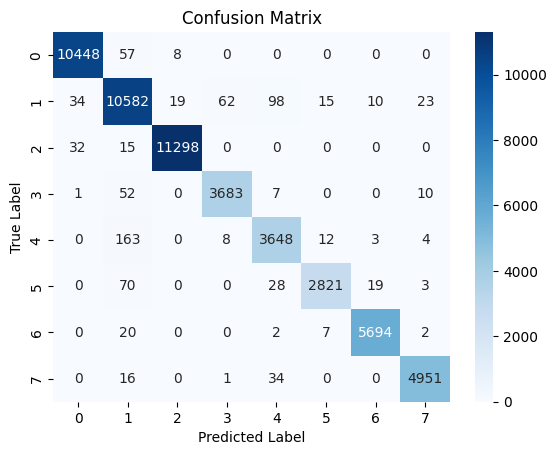

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **DeepNeighborhoodClassifier**
The name "DeepNeighborhood" suggests the combination of deep learning (neural networks) and the KNN algorithm, while "Classifier" indicates its purpose for classification tasks. This name emphasizes the integration of the two methods in tackling multi-class classification problems effectively.

In [ ]:
# Define a simple feedforward neural network for feature extraction
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
])

# Train the feature extraction model
feature_extractor = model(X_train)

# Extract features
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)


# Train the KNN classifier on the extracted features
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_features, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test, y_pred))

1687/1687 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10513
           1       0.96      0.96      0.96     10843
           2       1.00      0.99      1.00     11345
           3       0.96      0.98      0.97      3753
           4       0.93      0.93      0.93      3838
           5       0.98      0.93      0.96      2941
           6       0.99      1.00      0.99      5725
           7       0.98      0.99      0.98      5002

    accuracy                           0.98     53960
   macro avg       0.97      0.97      0.97     53960
weighted avg       0.98      0.98      0.98     53960



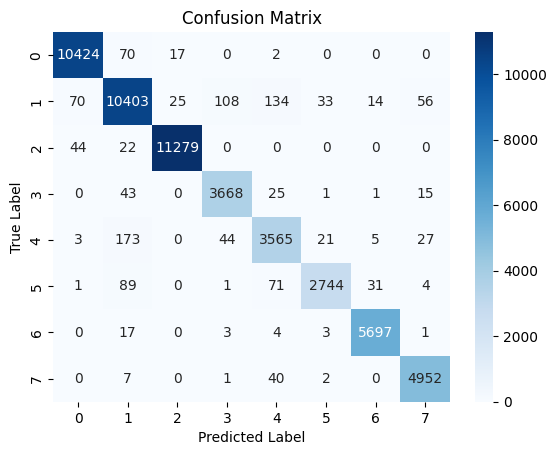

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **BoostedPCAClassifier**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the explained variance
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = xgb_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5305
           1       0.98      0.99      0.99      5434
           2       1.00      1.00      1.00      5662
           3       0.99      0.99      0.99      1834
           4       0.99      0.98      0.98      1857
           5       1.00      0.98      0.99      1462
           6       1.00      1.00      1.00      2922
           7       1.00      1.00      1.00      2504

    accuracy                           0.99     26980
   macro avg       0.99      0.99      0.99     26980
weighted avg       0.99      0.99      0.99     26980



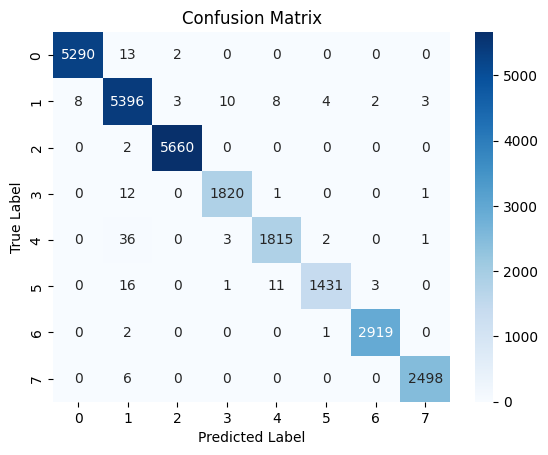

In [ ]:

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


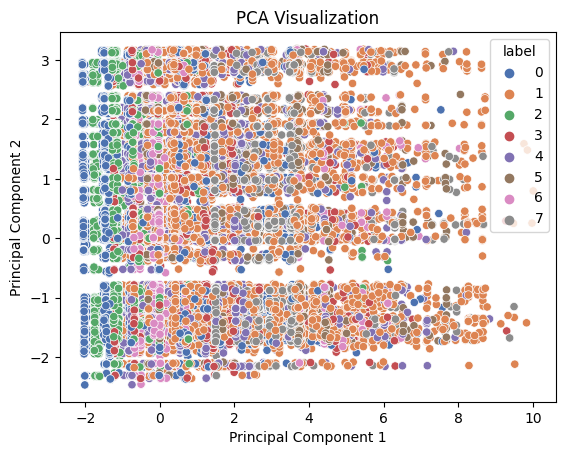

In [ ]:
# Visualize PCA components
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["label"] = y

# Plot first two PCA components
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", palette="deep", legend="full")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

# **Ensemble Voting Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X_train,
             y_train)

# Prediction
result = rf_model.predict(X_test)

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X_train,
             y_train)

# Prediction
result = knn_model.predict(X_test) 

In [ ]:
# Neural Network
# Create Model with configuration 
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X_train,y_train)

# Prediction
result = nn_model.predict(X_test)

In [ ]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X_train,y_train)   

# Prediction
result = eclf1.predict(X_test)

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.9867309117865085
Recall      :  0.9867309117865085
Precision   :  0.9868501969731753
F1 Score    :  0.9867309117865085
Confusion Matrix: 
[[5284   17    4    0    0    0    0    0]
 [   9 5361    3    8   43    0    0   10]
 [  18    1 5643    0    0    0    0    0]
 [   0   24    0 1807    0    0    0    3]
 [   3   93    0    2 1748    1    0   10]
 [   1   55    0    0   17 1383    6    0]
 [   0    5    0    0    6    0 2911    0]
 [   0    5    0    0   14    0    0 2485]]


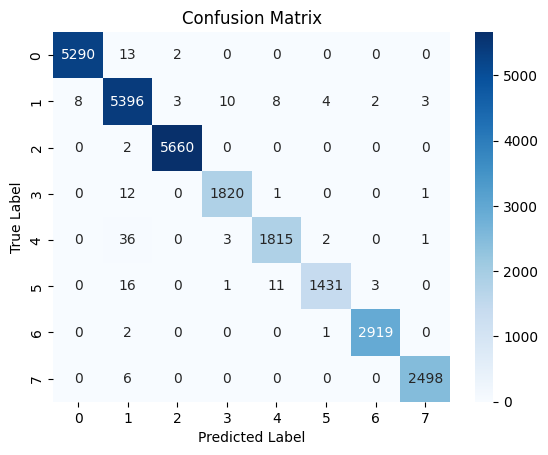

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
